#  Project 1: TMDb movie dataset

## Introduction
### Dataset Description 
>We will be analysing data on 10,000 movies collected from The Movie Database. 
The dataset has these features: imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj./
We will be finding which genres are more popular over time, what properties are associated with movies that have high revenues and also if there is any correlation between the budget of the movies and its rating.

### Question(s) for Analysis
1. What is the relationship between the popularity(rating) of a movie and its budget, runtime, revenue?
2. Is there an existing relationship between the runtime of a movie and the revenue it generates?


In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

## Data Wrangling
In this section, we will load our data and clean it(missing values, duplicates) for analysis.

### General Properties

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.shape

(10866, 21)

In [4]:
#dataset description
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#dropping features with many missing values
df.drop(['homepage','tagline'],axis=1,inplace=True)
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
#Replacing missing values with 'null' for string features
df.fillna('null',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10866 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10866 non-null  object 
 7   director              10866 non-null  object 
 8   keywords              10866 non-null  object 
 9   overview              10866 non-null  object 
 10  runtime               10866 non-null  int64  
 11  genres                10866 non-null  object 
 12  production_companies  10866 non-null  object 
 13  release_date          10866 non-null  object 
 14  vote_count            10866 non-null  int64  
 15  vote_average       

### Checking and changing data types from object to string

In [8]:
# although the datatype for diagnosis appears to be object, further investigation shows it's a string
type(df['cast'][0])

str

In [9]:
df['imdb_id'] = df['imdb_id'].astype('string')
df['cast'] = df['cast'].astype('string')
#df['release_date'] = df['release_date'].astype('datetime')

In [10]:
df.dtypes

id                        int64
imdb_id                  string
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     string
director                 object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Checking and dropping duplicates

In [11]:
#checking for duplicates
sum(df.duplicated())

1

In [12]:
#dropping duplicates
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [13]:
df.shape

(10865, 19)

## Exploratory Data Analysis

### Research Question 1- What is the relationship between the popularity(rating) of a movie and its budget, runtime, revenue?

In [14]:
#movies with the highest popularity
df.sort_values('popularity',ascending=False)[:6]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,washington d.c.|future|shield|marvel comic|comic,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,Marvel Studios,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08


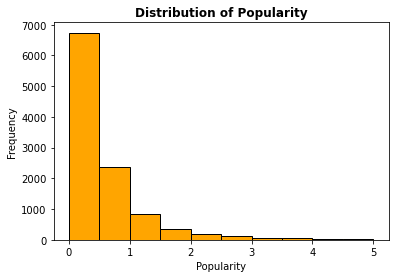

In [55]:
#Checking the distribution in popularity of the movies
bins=np.arange(0,df['popularity'].quantile(0.99)+0.5,0.5)
df['popularity'].hist(color='orange',bins=bins,edgecolor='black',grid=False)
plt.title('Distribution of Popularity',weight='bold')
plt.xlabel('Popularity')
plt.ylabel('Frequency');

> A majority of the movies have a popularity of between 0 and 0.5

#### Feature Engineering
>We will introduce a new feature called 'rating'. We will engineer it using 'popularity' and 'vote_average'. 
Combining 2 features will be useful in reaping better results as compared to drawing conclusions from 1 feature.

In [26]:
#Feature Engineering
df['rating']=df['popularity']/df['vote_average']
df.sort_values('rating',ascending=False)[:6]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rating
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,5.074733
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,4.002808
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,3.118642
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2.081350
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08,1.811545
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,washington d.c.|future|shield|marvel comic|comic,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,Marvel Studios,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08,1.706714


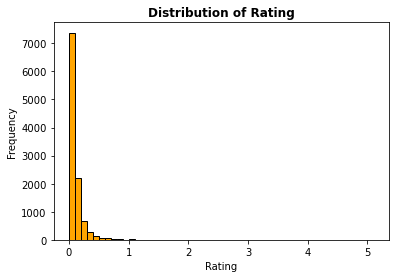

In [52]:
#Checking Rating Distribution
bins=np.arange(0,df['rating'].max()+0.1,0.1)
df['rating'].hist(color='orange',bins=bins,edgecolor='black',grid=False)
plt.title('Distribution of Rating',weight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency');

>The new feature-'rating', still fetches the same top 6 movies just as 'Popularity' does.
>The rating for most of the movies ranges between 0 and 0.1.

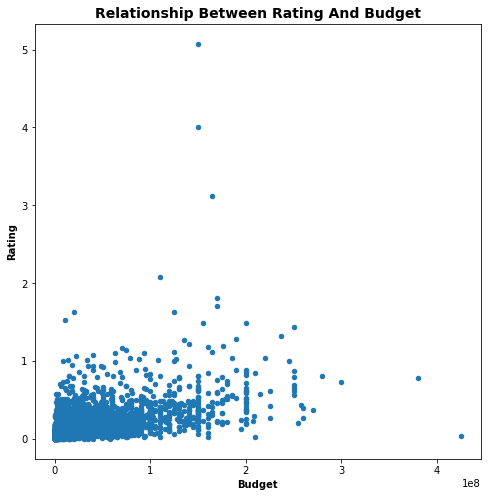

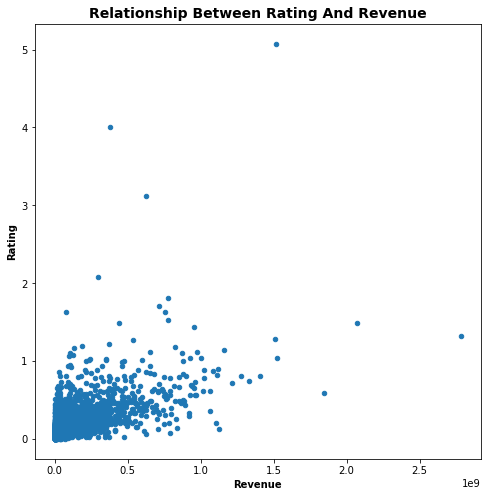

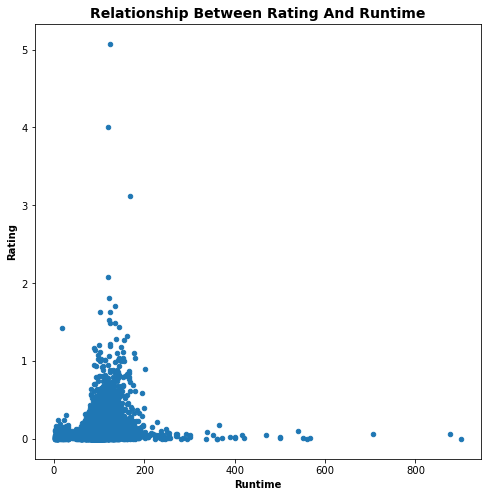

In [84]:
#A funtion that plots scatter plots for the different features in question
def myScatterPlot(df,xVar,yVar):
    df.plot(kind='scatter',x=xVar,y=yVar,figsize=[8,8]);
    plt.title(f'Relationship between {yVar} and {xVar}'.title(),fontsize=14, weight='bold')
    plt.xlabel(xVar.title(),fontsize=10, weight='bold')
    plt.ylabel(yVar.title(),fontsize=10, weight='bold')
myScatterPlot(df.query('budget>0'),'budget','rating')
myScatterPlot(df.query('revenue>0'),'revenue','rating')
myScatterPlot(df.query('runtime>0'),'runtime','rating')

>There is a positive correclation between Rating and Budget.
>There is also a positive correlation between Rating and Revenue.
>There is no correlation between Rating and Runtime of a movie.

### Research Question 2: Is there an existing relationship between the runtime of a movie and the revenue it generates?

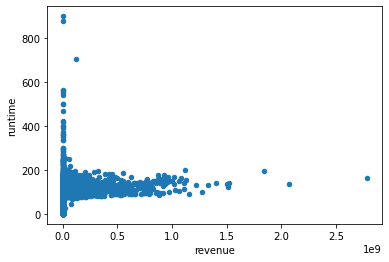

In [85]:
#Relashionship between Runtime and revenue
df.plot.scatter(x='revenue', y='runtime');

> Movies with a runtime between 80-200 minutes generate more revenue than those with a longer or shorter runtime.

## Conclusions

>There seems to be a positive correlation between the budget and the rating of a movie.
>There is positive correlation between the rating of a movie and the revenue it generates.
>There is no correlation between the movie runtime and its rating.
>Movies with an average of 80-200 minutes generate more revenue as compared to those with a shorter or longer runtime.

Limitation:Replacing missing values(with data type object/string) with null may cause some bias in analysing the data.  Collecting and filling up the missing values would have been the best way to replace such, especially for features with unique entries like id and imdb_id.

In [94]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1